In [50]:
import datetime
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  #MacOS自带字体
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
import seaborn as sns
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [51]:
df = pd.read_csv('data/taxis.csv')
df['pickup'] = pd.to_datetime(df['pickup'])
df['dropoff'] = pd.to_datetime(df['dropoff'])
df.shape

(6433, 14)

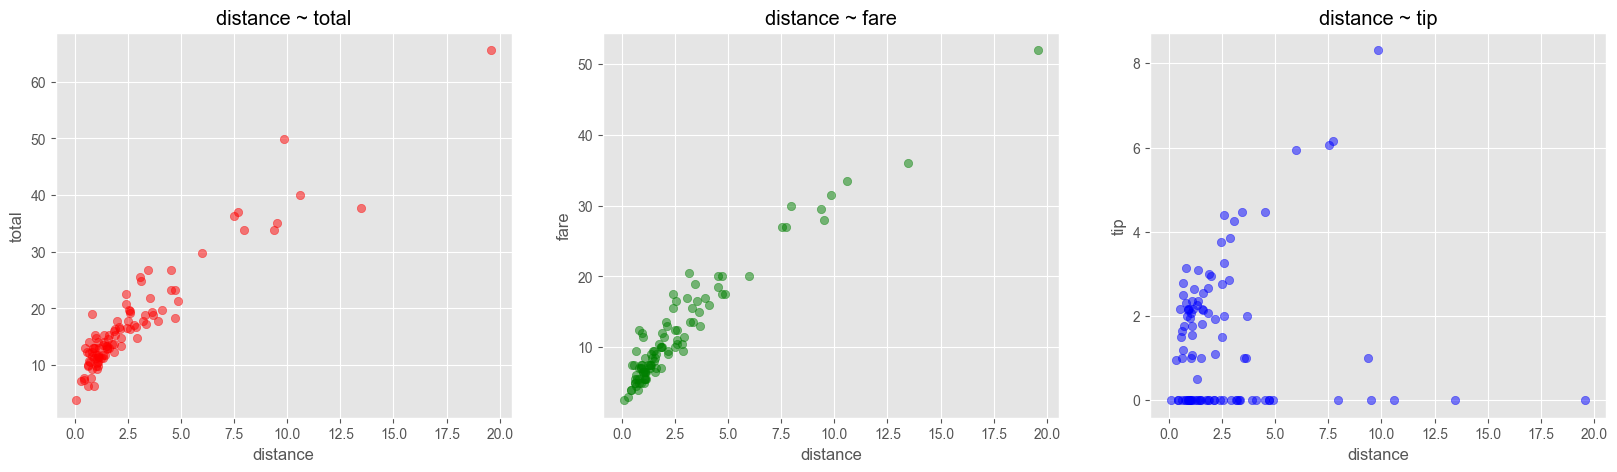

In [52]:
length = 100
s_distanceVStotal = Series(df['total'][:length].values,index=df['distance'][:length].values).drop([0.0])
s_distanceVSfare = Series(df['fare'][:length].values,index=df['distance'][:length].values).drop([0.0])
s_distanceVStip = Series(df['tip'][:length].values,index=df['distance'][:length].values).drop([0.0])
with plt.style.context('ggplot'):
    fig,ax = plt.subplots(1,3,figsize=(15,5))
    fig.figure.set_size_inches(20,5)
    ax[0].scatter(s_distanceVStotal.index,s_distanceVStotal.values, color='r', alpha=0.5)
    ax[0].set_title('distance ~ total')
    ax[0].set_xlabel('distance')
    ax[0].set_ylabel('total')
    ax[1].scatter(s_distanceVSfare.index,s_distanceVSfare.values, color='g', alpha=0.5)
    ax[1].set_title('distance ~ fare')
    ax[1].set_xlabel('distance')
    ax[1].set_ylabel('fare')
    ax[2].scatter(s_distanceVStip.index,s_distanceVStip.values, color='b', alpha=0.5)
    ax[2].set_title('distance ~ tip')
    ax[2].set_xlabel('distance')
    ax[2].set_ylabel('tip')
    plt.show()

In [53]:
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [72]:
# 选择时间范围在2019年3月的行

# s_pickupVSdistance = Series(df['distance'].values,index=df['pickup'].values)
# s_pickupVSdistance['2019-03']

df_20190301To10 = df.loc[df['pickup'].dt.year == 2019].loc[df['pickup'].dt.month == 3].loc[df['pickup'].dt.day <= 10]
df_20190301To10.tail()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
6415,2019-03-03 08:42:49,2019-03-03 08:46:55,1,0.89,5.00,0.00,0.00,5.80,green,cash,Washington Heights South,Washington Heights South,Manhattan,Manhattan
6417,2019-03-10 12:10:45,2019-03-10 12:43:05,2,11.17,35.00,0.00,5.76,41.56,green,credit card,Hillcrest/Pomonok,Flatiron,Queens,Manhattan
6418,2019-03-02 21:47:50,2019-03-02 21:55:34,1,1.48,7.50,1.76,0.00,10.56,green,credit card,Forest Hills,Kew Gardens Hills,Queens,Queens
6425,2019-03-07 15:34:30,2019-03-07 16:31:06,1,9.12,26.32,0.00,0.00,26.82,green,credit card,Park Slope,East New York,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.00,0.00,0.00,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


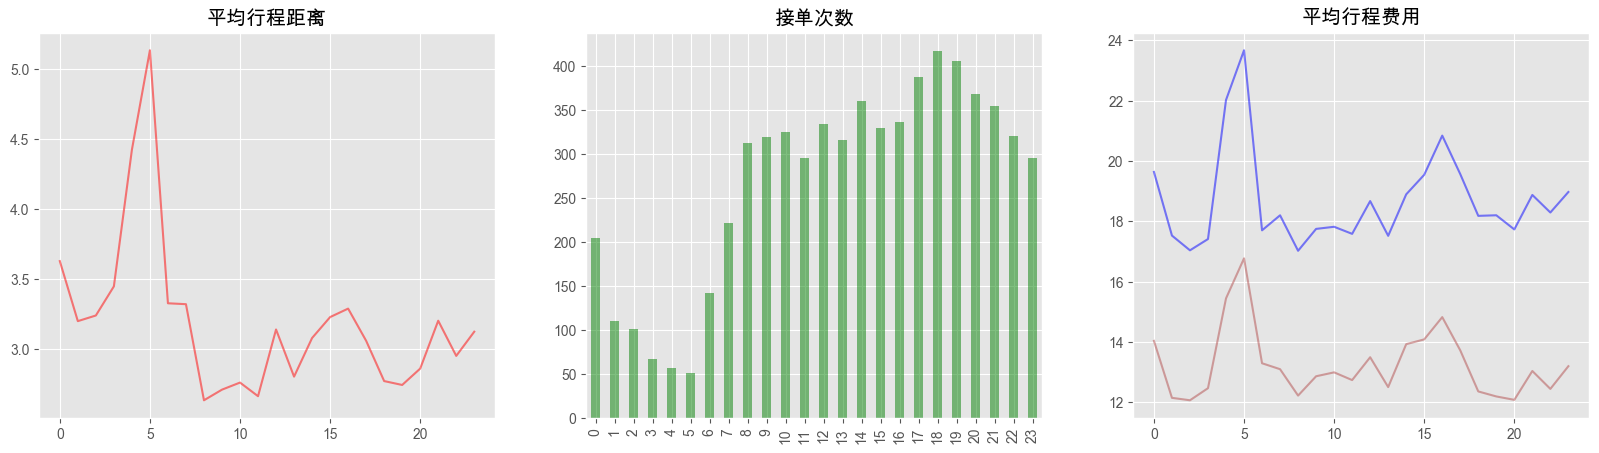

In [120]:
pickupHourVSdistance = [df.loc[df['pickup'].dt.hour == hour ]['distance'].values for hour in range(0,24)]
pickupHourVStotal = [df.loc[df['pickup'].dt.hour == hour ]['total'].values for hour in range(0,24)]
pickupHourVSfare = [df.loc[df['pickup'].dt.hour == hour ]['fare'].values for hour in range(0,24)]
with plt.style.context('ggplot'):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    Series([np.mean(each) for each in pickupHourVSdistance],index=range(0,24)).plot(ax=axes[0], color='r', alpha=0.5)
    axes[0].set_title('平均行程距离')
    Series([len(each) for each in pickupHourVSdistance],index=range(0,24)).plot(ax=axes[1], color='g', alpha=0.5, kind='bar')
    axes[1].set_title('接单次数')
    Series([np.mean(each) for each in pickupHourVStotal],index=range(0,24)).plot(ax=axes[2], color='b', alpha=0.5)
    Series([np.mean(each) for each in pickupHourVSfare],index=range(0,24)).plot(ax=axes[2], color=(0.7,0.3, 0.3), alpha=0.5)
    axes[2].set_title('平均行程费用')
    plt.show()